<a href="https://colab.research.google.com/gist/cpatiffanynguyen/e3b00425330bf93f72f3eb6cd8d79589/beautifulsoup-ai-venture-startup-articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import files

In [ ]:
def scrape_articles_info(urls, pages=1):
    articles_info = []
    for base_url in urls:
        for page in range(1, pages + 1):
            url = f"{base_url}page/{page}/"
            response = requests.get(url)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, 'html.parser')
                articles = soup.find_all('div', class_='post-block post-block--image post-block--unread')
                for article in articles:
                    title = article.find('a', class_='post-block__title__link').get_text(strip=True)
                    date = article.find('time')['datetime'][:10]
                    article_url = article.find('a', class_='post-block__title__link')['href']
                    articles_info.append({'Title': title, 'Date': date, 'URL': article_url})
            else:
                print(f"Failed to retrieve webpage: {url}")
    return articles_info

In [ ]:
urls_to_scrape = [
    'https://techcrunch.com/category/startups/',
    'https://techcrunch.com/category/venture/',
    'https://techcrunch.com/category/artificial-intelligence/',
]

In [ ]:
articles_info = scrape_articles_info(urls_to_scrape)
articles_df = pd.DataFrame(articles_info, columns=['Title', 'Date', 'URL'])

Failed to retrieve webpage: https://www.fintech.coffee/research/101-switzerlandpage/1/


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
display(articles_df)


,Title,Date,URL
0,NewRetirement wants to simplify financial planning for retirement,2024-03-27,https://techcrunch.com/2024/03/27/newretirement-wants-to-simplify-financial-planning-for-retirement/
1,Musical toy startup Playtime Engineering wants to simplify electronic music making for kids,2024-03-27,https://techcrunch.com/2024/03/27/musical-toy-startup-playtime-engineering-wants-to-simplify-electronic-music-making-for-kids/
2,Cyvl.ai is bringing data-driven solutions to transportation infrastructure,2024-03-27,https://techcrunch.com/2024/03/27/cyvl-ai-is-bringing-data-driven-solutions-to-transportation-infrastructure/
3,"Century Health, now with $2M, taps AI to give pharma access to good patient data",2024-03-27,https://techcrunch.com/2024/03/27/century-health-2m-ai-pharma-patient-data/
4,Act fast — just 3 days remain to grab your TechCrunch Early Stage 2024 tickets,2024-03-27,https://techcrunch.com/2024/03/27/act-fast-just-3-days-remain-to-grab-your-techcrunch-early-stage-2024-tickets/
5,A comprehensive list of 2023 & 2024 tech layoffs,2024-03-27,https://techcrunch.com/2024/03/27/tech-layoffs-2023-list/
6,"New study of unicorn founders finds most are ‘underdogs,’ and female founders are rising",2024-03-27,https://techcrunch.com/2024/03/27/unicorn-founders/
7,Wase zaps microbes to squeeze more biogas from wastewater sludge,2024-03-27,https://techcrunch.com/2024/03/27/wase-seed-fundraise/
8,"Marissa Mayer’s startup just rolled out photo sharing and event planning apps, and the internet isn’t sure what to think",2024-03-27,https://techcrunch.com/2024/03/27/marissa-mayers-startup-just-rolled-out-apps-for-group-photo-sharing-and-event-planning-and-the-internet-isnt-sure-what-to-think/
9,PayPal backs Indonesian insurance startup Qoala in $47M funding,2024-03-26,https://techcrunch.com/2024/03/26/paypal-backs-indonesia-insurance-startup-qoala-in-47m-funding/


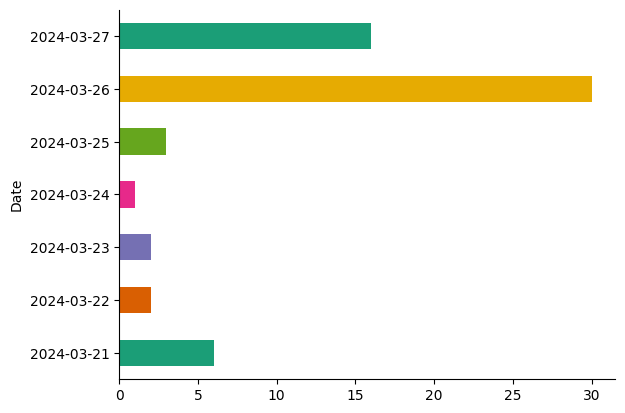

In [ ]:
# @title Date

from matplotlib import pyplot as plt
import seaborn as sns
articles_df.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Function to Scrape URLs. Only find links containing 'secure', 'raises', or 'raised' in URLs

###Scraping URLs for Each URL in the List

In [ ]:
articles_df = pd.DataFrame(articles_df, columns=['Title', 'URL', 'Date'])

# To save the DataFrame to an Excel file
# Ensure you have 'openpyxl' installed: pip install openpyxl
articles_df.to_excel('latest_techcrunch.xlsx', index=False, engine='openpyxl')


In [ ]:
from google.colab import files
files.download('/content/latest_techcrunch.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>